In [1]:
library(UpSetR)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [52]:
#---------------------------------------------------------------
#* 绘制upsetVenn图
#---------------------------------------------------------------
plotData=read.table("./upsetVenn.txt",header=T,sep="\t")
colnames(plotData)=c(
    "Orthogroup","A1","A2","(AD)1","(AD)2","(AD)3","(AD)4","(AD)5","D5"
)
head(plotData)

,Orthogroup,A1,A2,(AD)1,(AD)2,(AD)3,(AD)4,(AD)5,D5
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,OG0000000,1,1,1,1,1,1,1,1
2,OG0000001,1,1,1,1,1,1,1,1
3,OG0000002,1,1,1,1,1,1,1,1
4,OG0000003,1,1,1,1,1,1,1,1
5,OG0000004,1,1,1,1,1,1,1,1
6,OG0000005,1,1,1,1,1,1,1,1


png 
  2

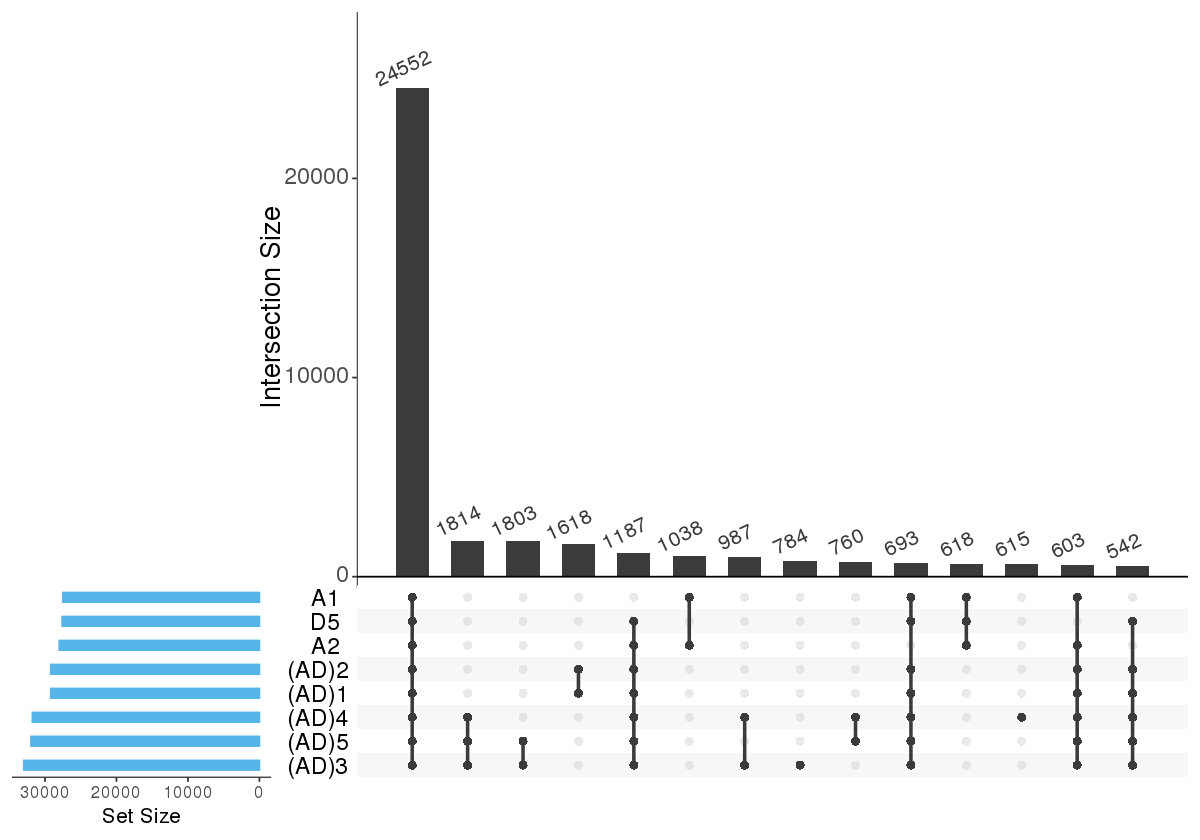

In [59]:

options(repr.plot.width = 10, repr.plot.heigh = 6)
p <- upset(plotData,
    sets = c("A1", "A2", "(AD)1", "(AD)2", "(AD)3", "(AD)4", "(AD)5", "D5"),
    sets.bar.color = "#56B4E9",
    line.size = 1,
    order.by = "freq",
    scale.intersections = "identity", #
    number.angles = 25,
    text.scale = c(2, 2, 1.5, 1.5, 2, 2) # 设置各种text文字大小
)
svg("upsetVenn.svg", width = 10, height = 6)
print(p)
dev.off()
p

In [2]:
#---------------------------------------------
# TODO: 分析不同类型的OrthoGroup基因中基因数目的统计
#---------------------------------------------
A1geneType <- read.table("./Ortho_genome/A1_OrthoGroup.txt", header = T)
A2geneType <- read.table("./Ortho_genome/A2_OrthoGroup.txt", header = T)
D5geneType <- read.table("./Ortho_genome/D5_OrthoGroup.txt", header = T)
AD1geneType <- read.table("./Ortho_genome/AD1_OrthoGroup.txt", header = T)
AD2geneType <- read.table("./Ortho_genome/AD2_OrthoGroup.txt", header = T)
AD3geneType <- read.table("./Ortho_genome/AD3_OrthoGroup.txt", header = T)
AD4geneType <- read.table("./Ortho_genome/AD4_OrthoGroup.txt", header = T)
AD5geneType <- read.table("./Ortho_genome/AD5_OrthoGroup.txt", header = T)

In [133]:
#---------------------------------
#* 获取绘图数据
#---------------------------------
getData <- function(inputData,genome) {
    CountData <- inputData %>%
        filter(OrthoType == "Variable") %>%
        count(OrthoGroup) %>%
        count(n, name = "OrthoGroupcount")
    geneCount=inputData %>%
        filter(OrthoType == "Variable") %>%
        count(OrthoGroup) %>% dim()
    count_gt_10 <- CountData %>%
        filter(n > 10) %>%
        summarise(sum(OrthoGroupcount))
    CountData[10, 2] <- CountData[10, 1] + count_gt_10[1, 1]
    CountData$genome=genome
    CountData$OrthoGroupcount=CountData$OrthoGroupcount /geneCount[1]
    return(CountData)
}
plotData <- getData(A1geneType, "A1")
plotData <- rbind(plotData, getData(A2geneType, "A2"))
plotData <- rbind(plotData, getData(D5geneType, "D5"))
plotData <- rbind(plotData, getData(AD1geneType, "AD1"))
plotData <- rbind(plotData, getData(AD2geneType, "AD2"))
plotData <- rbind(plotData, getData(AD3geneType, "AD3"))
plotData <- rbind(plotData, getData(AD4geneType, "AD4"))
plotData <- rbind(plotData, getData(AD5geneType, "AD5"))

png 
  2

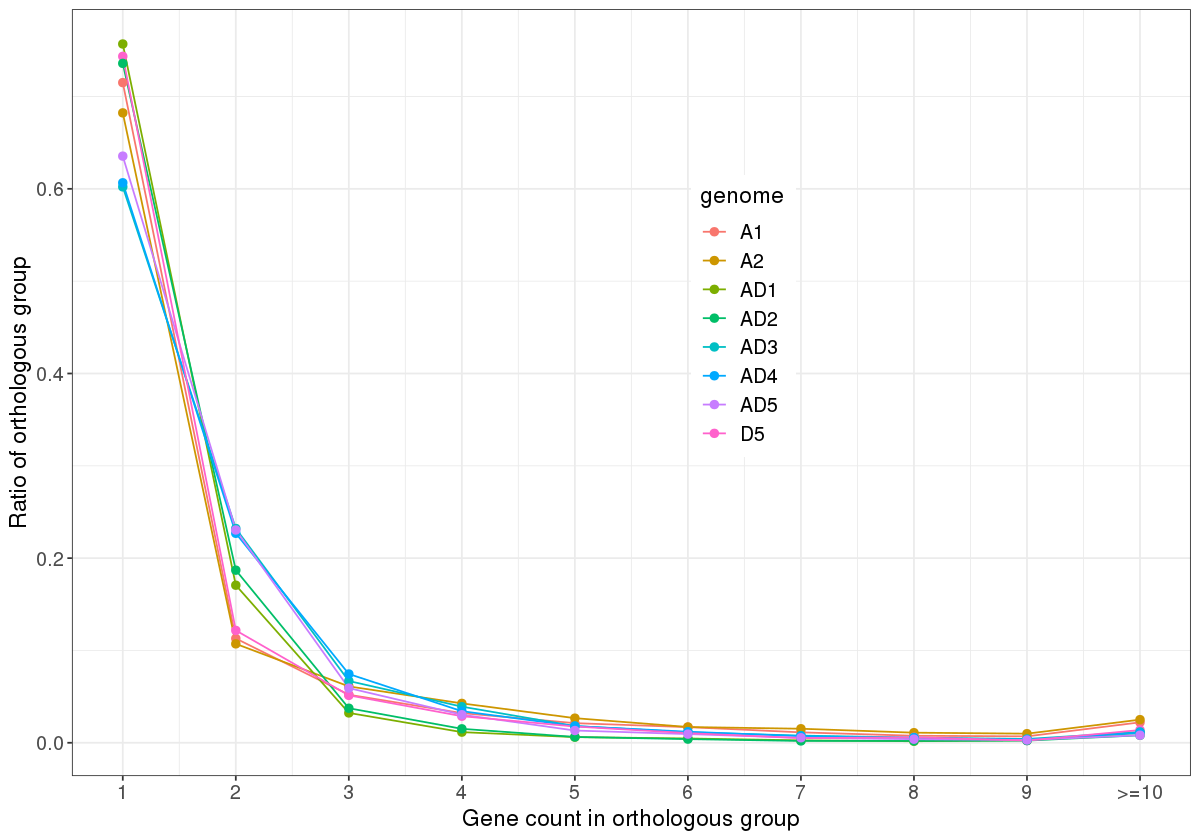

In [134]:
options(repr.plot.width = 10, repr.plot.heigh = 6)
p <- plotData %>%
    filter(n <= 10) %>%
    ggplot(aes(x = n, y = OrthoGroupcount, group = genome, color = genome)) +
    geom_line() +
    geom_point(size = 2) +
    theme_bw() +
    scale_x_continuous(
        breaks = seq(1, 10, 1),
        labels = c(seq(1, 9), ">=10")
    ) +
    theme(
        legend.position = c(0.6, 0.6),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14)
    ) +
    xlab("Gene count in orthologous group") +
    ylab("Ratio of orthologous group")
svg("Variable_orthologous_GeneCount.svg", width = 10, height = 6)
print(p)
dev.off()
p

In [8]:
#----------------------------------------------------------------
#* 包含多个基因的Orthologpus在不同物种间的变化
#----------------------------------------------------------------
library(pheatmap)
plotData=read.table("./GeneCount/required_mulGenes.txt",header=T,row.names = 1)
str(plotData)

'data.frame':	858 obs. of  8 variables:
 $ A1 : num  0.432 0.286 0.423 0.166 0.151 ...
 $ A2 : num  0.52 0.109 0.326 0.166 0.161 ...
 $ D5 : num  0.382 0.21 0.223 0.184 0.18 ...
 $ AD1: num  0.388 0.134 0.579 0.285 0.284 ...
 $ AD2: num  0.495 0.286 0.571 0.34 0.312 ...
 $ AD3: num  0.0376 0.5207 0.0445 0.4967 0.5865 ...
 $ AD4: num  0.00626 0.51233 0.02968 0.50591 0.47298 ...
 $ AD5: num  0.0313 0.4787 0.0297 0.4599 0.4162 ...


png 
  2

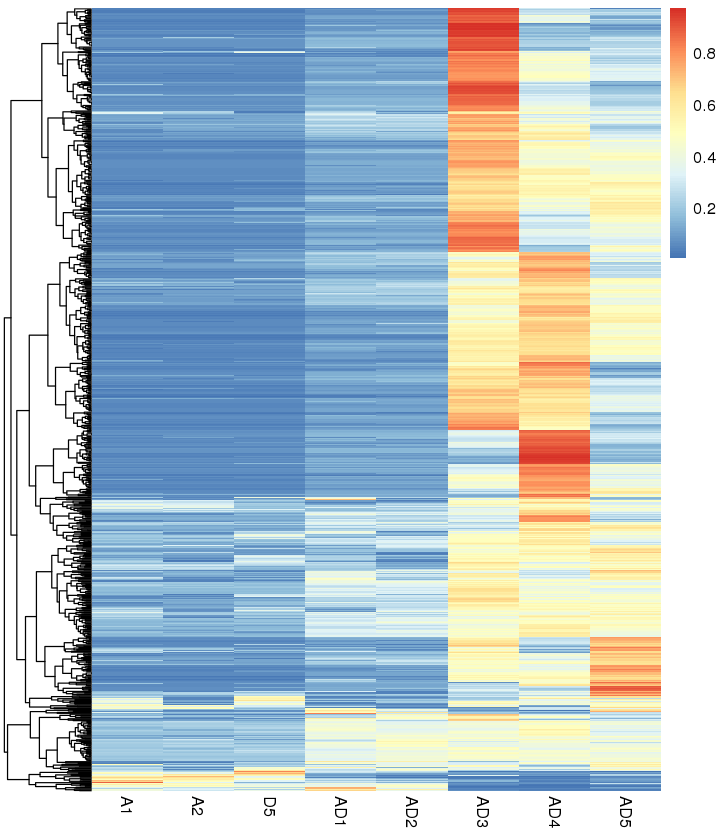

In [9]:
options(repr.plot.width = 6, repr.plot.heigh = 10)
p=pheatmap(
    plotData,
    show_rownames = F,
    show_colnames = T,
    cluster_rows = T,
    cluster_cols = F
)
svg("Required_multiGene_GeneCountVar.svg",width = 6,height = 10)
print(p)
dev.off()

In [10]:
#---------------------------------------------------
#TODO: 绘制状态分布图
#---------------------------------------------------
plotData=read.table("./GeneCount/polyploid.txt",header = T)
plotData$value=factor(plotData$value,levels = c('conserved','A2_loss','D5_loss','At_gain','Dt_gain','onlyAt','onlyDt','other'))
head(plotData)

,variable,value
,<fct>,<fct>
1,AD1,conserved
2,AD1,conserved
3,AD1,conserved
4,AD1,conserved
5,AD1,conserved
6,AD1,conserved


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


png 
  2

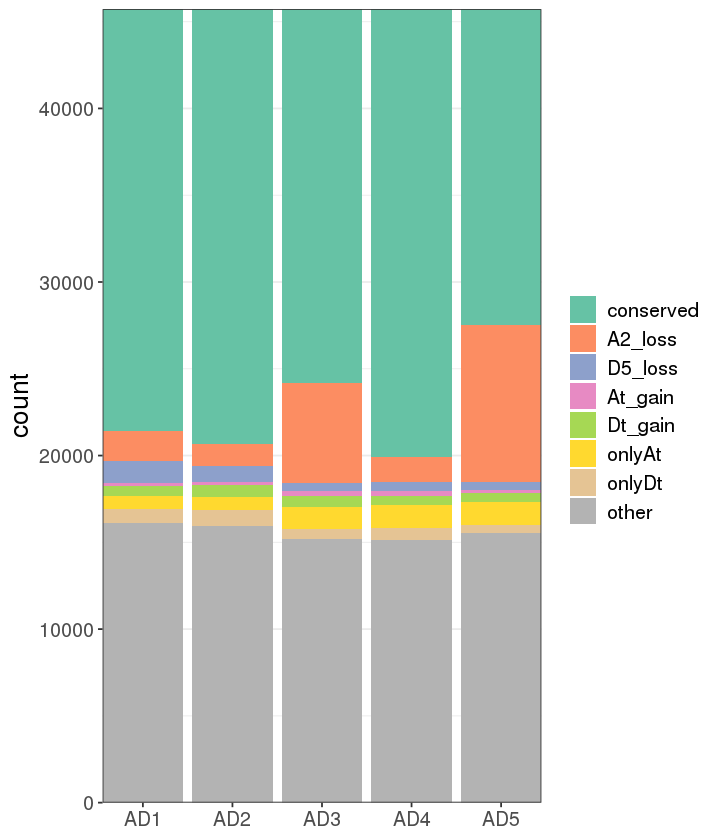

In [12]:
library(RColorBrewer)

g <- plotData %>%
    ggplot(aes(x = variable, fill = value)) +
    geom_histogram(
        stat = "count",
    ) +
    theme_bw() +
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    theme(
        legend.title = element_blank(),
        legend.text = element_text(size = 12),
        axis.title.y = element_text(size = 16),
        axis.title.x = element_blank(),
        axis.text = element_text(size = 12)
    ) +
    scale_fill_manual(
        values = brewer.pal(8, "Set2")
    )
svg("GeneType_between_tetraploid.svg")
print(g)
dev.off()
g

In [13]:
library(ggalluvial)
plotData <- read.table("./GeneCount/sankey.txt", header = T, sep = "\t")
plotData <- plotData %>% filter( !Freq %in% c(15126,13023))
plotData=plotData %>% filter( Freq %in% c(3636,2863,497,446,387,254,198))
plotData$geneType=seq(1,7,1)
plotData$geneType=factor(plotData$geneType)

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


png 
  2

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


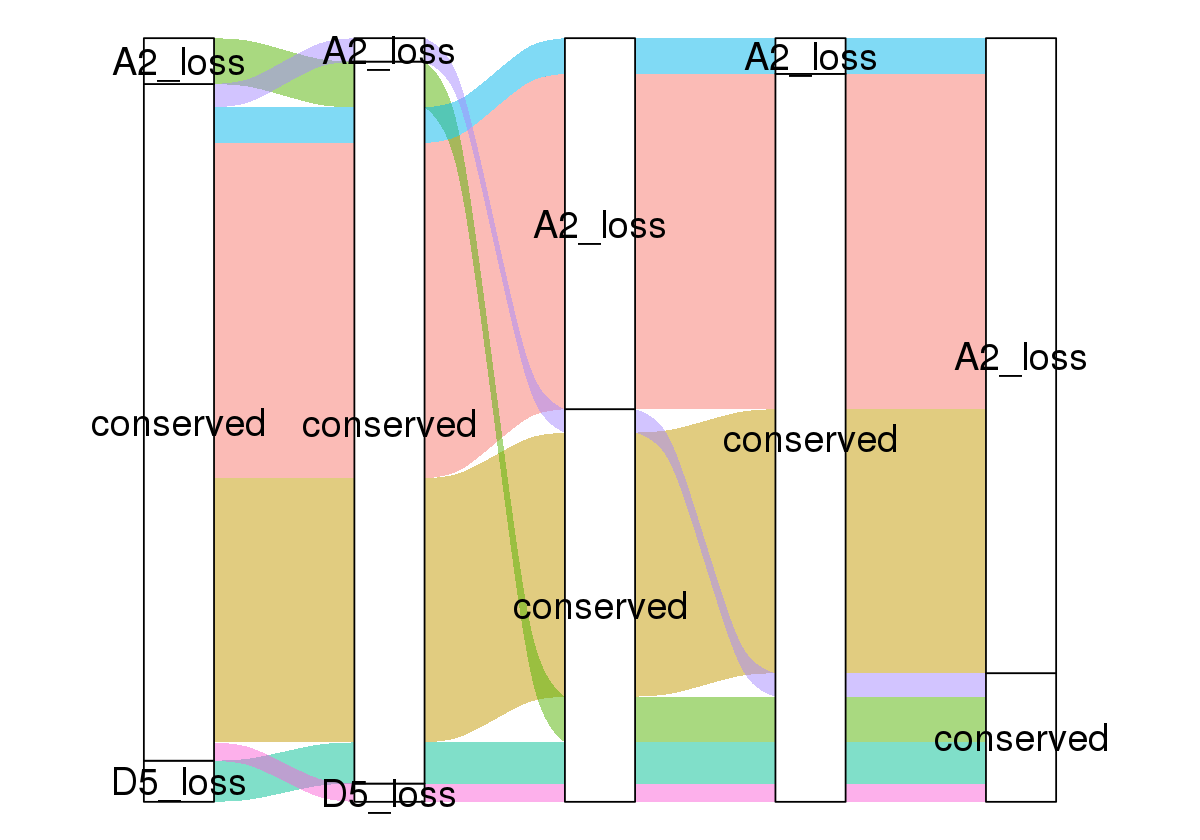

In [16]:
library(ggalluvial)
options(repr.plot.width = 10, repr.plot.heigh = 6)
p=ggplot(
  plotData,
  aes(
    y = Freq,
    axis1 = AD1,
    axis2 = AD2,
    axis3 = AD3,
    axis4 = AD4,
    axis5 = AD5
  )
) +
  scale_x_discrete(
    limits = c("AD1", "AD2", "AD3", "AD4", "AD5"),
    expand = c(.2, .05)
  ) +
  xlab("Demographic") +
  geom_alluvium(aes(fill = geneType)) +
  geom_stratum() +
  geom_text(
    stat = "stratum",
    aes(label = after_stat(stratum)),
    colour = "black",
    size = 8
  ) +
  theme_void() +
  theme(
    legend.position = "none"
  )
svg("Gene_alluvial.svg")  
print(p)
dev.off()
p